# **Бизнес- контекст**
Данный код предназначен для мониторинга позиций товаров бренда "ТЕЛОДВИЖЕНИЯ" на сайте  Wildberries по ключевым запросам.

**Анализ помогает**:

1.   Отслеживать видимость бренда в поисковой выдаче.
2.   Оценивать влияние рекламных кампаний (позиции с учетом промо-размещения).
3.   Оптимизировать SEO и продвижение товаров.

## **Ключевые запросы**
Анализируются два популярных запроса:

"лонгслив женский оверсайз"

"лонгслив женский"


## **Пороцесс сбора данных**
1.   Парсятся первые 3 страницы выдачи (можно увеличить количество страниц, изменив max_page).

2. Для каждого товара бренда фиксируются:

  * Позиция в органическом порядке(без рекламы) (position)

  * Позиция с учетом рекламы (promo_position)

  * Дата и время проверки (created_at)

  * Запрос, по которому найден товар (query)

  * Название товара (name)

  * Артикул товара (artcle)




# Сама программа

In [13]:
import requests
import datetime
import pandas as pd
arr  = [] # список всех полученных данных по бренду, запросу и названию карточки
query_list = ['лонгслив женский оверсайз', 'лонгслив женский'] # список запросов, которые будем отслеживать
max_page = 3 # максимальное кол-во страниц, которые мы смотрим
brand ='ТЕЛОДВИЖЕНИЯ' # бренд, который нас интересует
# цикл, который проходит по каждому запросу и каждой из 3 страниц (# должно быть 6 итераиций)

 Есть позиция , которую бы товар занимал на маркетплейсе без промо, а есть промопозиция, которая за свет трат на рекламу выше


In [14]:
# цикл, который проходит по каждому запросу и каждой из 3 страниц (# должно быть 6 итераиций)
for query in query_list:
  for page in range(1, max_page+1):
    res = requests.get(
    f"https://search.wb.ru/exactmatch/ru/female/v9/search?ab_testing=false&appType=64&curr=rub&dest=12358561&hide_dtype=13&lang=ru&page={page}&query={query}&resultset=catalog&sort=popular"
    ) # url, по которому мы отпрвляем запрос
    sp_of_card = res.json()['data']['products'] # список всех вкарточек на странице
    for card in sp_of_card: # для каждой карточки на опред. странице и по опред. запросу
      if card.get('log') and card['brand'] == brand: #если  у карточки  есть инфрмаци о ее месте на станице и тп & бренд карточки это ТЕЛОДВИЖЕНИЯ
        arr.append([
          card['log']['position'],  # позиция без рекламы
          card['log']['promoPosition'], # позиция с рекламой
          datetime.datetime.now(), # когда зафиксировали данные
          query,    # название запроса
          card['name'], # имя карточки
          card['id']

        ])


Работа в Pandas

In [15]:
df = pd.DataFrame(arr)
df.columns = ['position', 'promo_position', 'created_at', 'query', 'name', 'article' ]
df['diff'] = df['position'] - df['promo_position'] #столбце показывающий разность между естесвенной позицией и промо позицией

df


,position,promo_position,created_at,query,name,article,diff
0,402,21,2025-04-08 18:27:45.582218,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,233284873,381
1,426,34,2025-04-08 18:27:45.582229,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,233284870,392
2,521,36,2025-04-08 18:27:45.582231,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,217335659,485
3,793,40,2025-04-08 18:27:45.582233,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,233284872,753
4,488,56,2025-04-08 18:27:45.582238,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,217339663,432
5,1169,69,2025-04-08 18:27:45.582242,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,291157007,1100
6,1472,77,2025-04-08 18:27:45.582246,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,297440097,1395
7,1292,80,2025-04-08 18:27:45.582247,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,297440096,1212
8,1180,84,2025-04-08 18:27:45.582249,лонгслив женский оверсайз,Лонгслив женский оверсайз с принтом RACE,314822400,1096
9,1011,86,2025-04-08 18:27:45.582251,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,297440101,925


# Пример визуализации
Отследим динамику позиции карточки товара с артикулом 233284873
![image.png](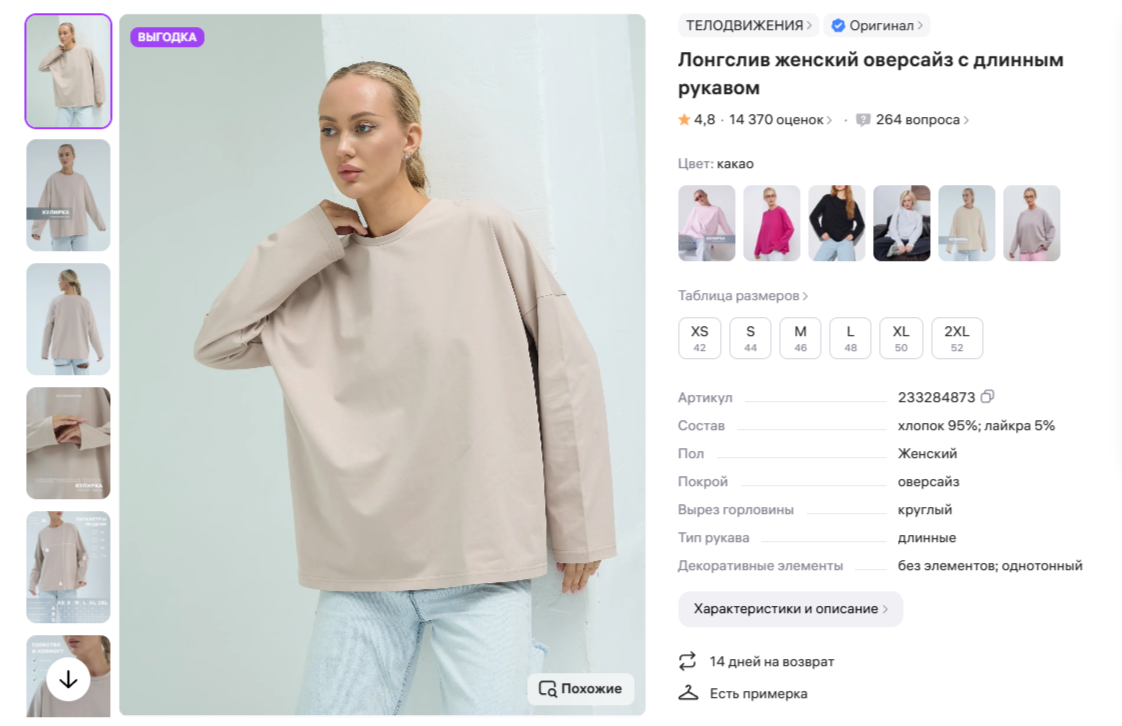![image.png]()

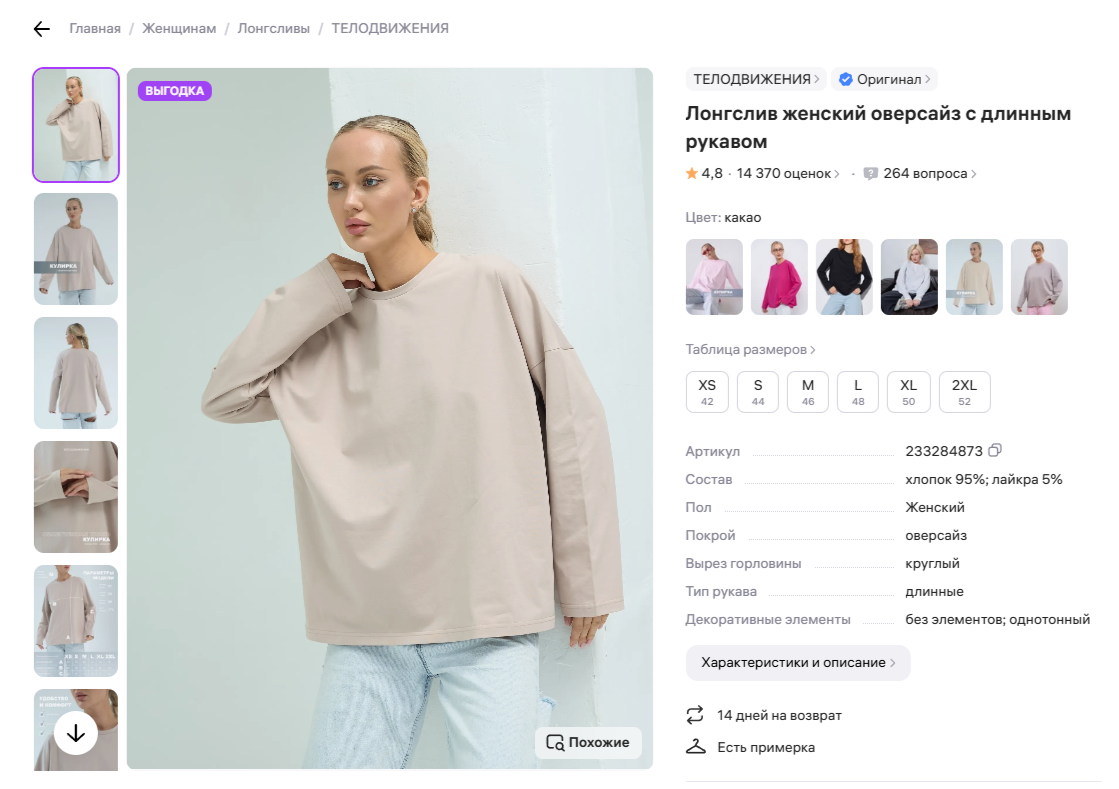

In [11]:
df1 = df.query("query == 'лонгслив женский оверсайз' and article == 233284873")
df1

,position,promo_position,created_at,query,name,article,diff
0,403,20,2025-04-08 18:25:23.728211,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,233284873,383
35,402,21,2025-04-08 18:25:33.840570,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,233284873,381
69,402,21,2025-04-08 18:27:11.991408,лонгслив женский оверсайз,Лонгслив женский оверсайз с длинным рукавом,233284873,381


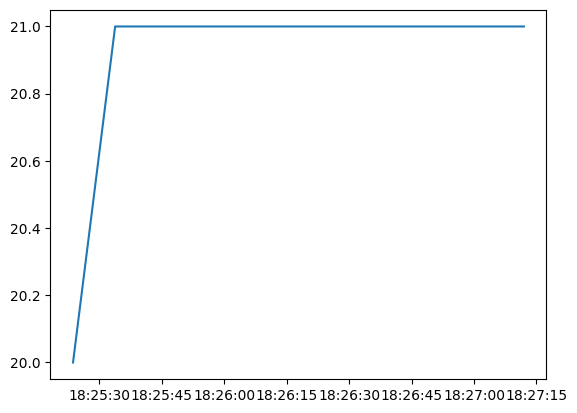

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1['created_at'], df1['promo_position']);

Предпологается, что такая динамичная визуализация будет показывать позицию ( а можно и другие метрики) каждый день


##  Дальнейшее развитие
* Добавление большего количества запросов и брендов.

* Автоматизация (например, запуск скрипта раз в день и сохранение в Google Sheets).

* Интеграция с другими метриками (цена, остатки, продажи).

* Создание интерактивного дашборда

* Можно настроить программу так, чтобы уведомления приходили, если позиция (органическая и промо позиция) ниже определенного значения